In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [27]:
class ActivationEnergy:
    def __init__(self,file_paths, temperatures):
        self.file_paths = file_paths
        self.temperatures = temperatures
        
        
        
    # using Arrhenius equation to extract activation energy 
    def arrhenius_equation(self,mgr_dic,row,col, ax):
        R = 8.314 # J/mol*K
        T = np.array(self.temperatures)+273.15 # Convert to K
        #np.exp(mgr/µ0) == - Ea/(R*T)
        delete_indx = []
        for i in [0,1,2,3]:
            if i not in mgr_dic.keys():
                delete_indx.append(i)
        T = np.delete(T,delete_indx)
        if len( delete_indx) == 4:
            print('empty can not do the calculation')
            return 
        reciprocal_temperature = 1/T
        mgr = list(mgr_dic.values())
        ln_mgr = np.log(mgr)
        print('reciprocal_temperature', reciprocal_temperature)
        print('ln_mgr',ln_mgr)
        
        
        
        
        ax.scatter(reciprocal_temperature,ln_mgr)
        ax.set_xlabel('1/Temperature(1/K)')
        ax.set_ylabel('ln(μ)')
        ax.set_title('Arrenius Plot'+' row '+row+'col'+ col)
        ax.grid(True)
        #plt.show()
        # fit a linear regression line 
        slope, intercept, r_value , p_value, std_err = linregress(reciprocal_temperature,ln_mgr)
        ax.plot(reciprocal_temperature, reciprocal_temperature*slope + intercept, color='red')
        # calculate the activation energy
        Ea = - slope * R
        print('Activation Energy is:', Ea, 'J/mol', 'r_value is:',r_value)
        plt.show()
        return Ea

    def read_mgrfile(self,path):
        df = pd.read_csv(path)
        df.set_index('Unnamed: 0',inplace = True)
        
        return df

    def calculate_activation_energy(self):
        df_list = []
        
        for file_path in self.file_paths:
            df = self.read_mgrfile(file_path)
            df_list.append(df)
            
        columns = df_list[0].columns[:]
        rows = df_list[0].index.tolist()
        print(columns)
        Eadf = pd.DataFrame(index =rows,columns = columns )
        
        for idx, (file_path, temperature) in enumerate(zip(self.file_paths, self.temperatures)):
            #df = self.read_mgrfile(file_path)
            #temperature = np.array(temperature) # Ensure temperature is an array
        
            for col in columns:
                for row in rows:
                    mgr_dic = {}
                    idx1 = 0
                    for df in df_list:
                        mgr = df.loc[row,col]
                        mgr = float(mgr)
                        if not pd.isnull(mgr) and np.isfinite(mgr) and mgr>0:
                            mgr_dic[idx1]=mgr
                            #self.arrhenius_equation(mgr)
                            #print(f'Calculating activation energy for Strain:{idx}, Carbon Source:{col}')
                        else:
                            #self.arrhenius_equation()
                            #mgr_list.append()
                            print(f'Invalid value for Carbon Source: {col}')
                        idx1 +=1
                    print(f'Calculating activation energy for Strain: {row}, Carbon Source:{col}')
                    print(mgr_dic)
                    if  mgr_dic:
                        Ea = self.arrhenius_equation(mgr_dic,row,col)
                        if Ea is not None:
                            Eadf.loc[row, col] =Ea
                    
    
            print('Eadf is:', Eadf)
            Eadf.to_excel('/Users/liucheng/Desktop/Eadf_without_modeling.xlsx')
            return Eadf
    
    def plot_designated_carbon(self, carbon_source):
        df_list =[]

#         print(f"Writing to {target_file}") 
#         self.mgrdf.to_csv(target_file)
        

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

class ActivationEnergy:
    def __init__(self, file_paths, temperatures):
        self.file_paths = file_paths
        self.temperatures = temperatures
        
    # Using Arrhenius equation to extract activation energy 
    def arrhenius_equation(self, mgr_dic, row, col, ax):
        R = 8.314  # J/mol*K
        T = np.array(self.temperatures) + 273.15  # Convert to K
        
        delete_indx = []
        for i in range(4):
            if i not in mgr_dic.keys():
                delete_indx.append(i)
        
        T = np.delete(T, delete_indx)
        if len(delete_indx) == 4:
            print('Empty, cannot do the calculation')
            return None
        
        reciprocal_temperature = 1 / T
        mgr = list(mgr_dic.values())
        ln_mgr = np.log(mgr)
        
        ax.scatter(reciprocal_temperature, ln_mgr)
        ax.set_xlabel('1/Temperature (1/K)')
        ax.set_ylabel('ln(μ)')
        ax.set_title(f'Arrhenius Plot: {row} - {col}')
        ax.grid(True)
        
        # Fit a linear regression line
        slope, intercept, r_value, p_value, std_err = linregress(reciprocal_temperature, ln_mgr)
        ax.plot(reciprocal_temperature, reciprocal_temperature * slope + intercept, color='red')
        
        # Calculate the activation energy
        Ea = -slope * R
        
        print(f'Activation Energy is: {Ea} J/mol, r_value is: {r_value}')
        ax.text(0.05, 0.95, f'r_value: {r_value:.2f}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
        return Ea

    def read_mgrfile(self, path):
        df = pd.read_csv(path)
        df.set_index('Unnamed: 0', inplace=True)
        return df

    def calculate_activation_energy(self):
        df_list = [self.read_mgrfile(file_path) for file_path in self.file_paths]
        columns = df_list[0].columns[:]
        rows = df_list[0].index.tolist()
        
        Eadf = pd.DataFrame(index=rows, columns=columns)
        
        for col in columns:
            fig, axs = plt.subplots(12, 8, figsize=(20, 20), constrained_layout=True)  # 96 subplots in a 12x8 grid
            axs = axs.flatten()  # Flatten the 2D array of axes to 1D
            
            for idx, row in enumerate(rows):
                mgr_dic = {}
                for idx1, df in enumerate(df_list):
                    mgr = df.loc[row, col]
                    if not pd.isnull(mgr) and np.isfinite(mgr) and mgr > 0:
                        mgr_dic[idx1] = float(mgr)
                    else:
                        print(f'Invalid value for Carbon Source: {col}')
                
                print(f'Calculating activation energy for Strain: {row}, Carbon Source: {col}')
                print(mgr_dic)
                
                if len(mgr_dic)>=3:
                    Ea = self.arrhenius_equation(mgr_dic, row, col, axs[idx])
                
                    
                    if Ea is not None:
                        Eadf.loc[row, col] = Ea
                        
                else:
                    return None
            
            plt.suptitle(f'Arrhenius Plots for Carbon Source: {col}', fontsize=16)
            plt.show()
        
        print('Eadf is:', Eadf)
        Eadf.to_excel('/Users/liucheng/Desktop/Eadf_without_modeling.xlsx')
        return Eadf

    def plot_for_carbon_source(self, carbon_source):
        df_list = [self.read_mgrfile(file_path) for file_path in self.file_paths]
        rows = df_list[0].index.tolist()
        
        if carbon_source not in df_list[0].columns:
            print(f'Carbon source {carbon_source} not found in data.')
            return
        
        fig, axs = plt.subplots(12, 8, figsize=(20, 20), constrained_layout=True)  # 96 subplots in a 12x8 grid
        axs = axs.flatten()  # Flatten the 2D array of axes to 1D
        
        for idx, row in enumerate(rows):
            mgr_dic = {}
            for idx1, df in enumerate(df_list):
                mgr = df.loc[row, carbon_source]
                if not pd.isnull(mgr) and np.isfinite(mgr) and mgr > 0:
                    mgr_dic[idx1] = float(mgr)
                else:
                    print(f'Invalid value for Carbon Source: {carbon_source}')
            
            print(f'Calculating activation energy for Strain: {row}, Carbon Source: {carbon_source}')
            print(mgr_dic)
            
            if mgr_dic:
                Ea = self.arrhenius_equation(mgr_dic, row, carbon_source, axs[idx])
                if Ea is not None:
                    # Update the Eadf DataFrame as needed
                    pass
        
        plt.suptitle(f'Arrhenius Plots for Carbon Source: {carbon_source}', fontsize=16)
        plt.show()




Calculating activation energy for Strain: 1A01, Carbon Source: MB
{0: 4.949942453507031, 1: 9.853842991701352, 2: 3.4462386705431034, 3: 3.4462386705431034}
Activation Energy is: -30063.662041687814 J/mol, r_value is: 0.5506636906332263
Invalid value for Carbon Source: MB
Invalid value for Carbon Source: MB
Invalid value for Carbon Source: MB
Calculating activation energy for Strain: 3B05, Carbon Source: MB
{0: 3.124879054637703}
Calculating activation energy for Strain: 1A01, Carbon Source: MB
{0: 4.949942453507031, 1: 9.853842991701352, 2: 3.4462386705431034, 3: 3.4462386705431034}
Activation Energy is: -30063.662041687814 J/mol, r_value is: 0.5506636906332263
Invalid value for Carbon Source: MB
Invalid value for Carbon Source: MB
Invalid value for Carbon Source: MB
Calculating activation energy for Strain: 3B05, Carbon Source: MB
{0: 3.124879054637703}
Activation Energy is: nan J/mol, r_value is: 0.0
Calculating activation energy for Strain: 3C02, Carbon Source: MB
{0: 5.40626587468

/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Activation Energy is: 56505.594770119824 J/mol, r_value is: -0.9489427444077588
Calculating activation energy for Strain: G2R07, Carbon Source: MB
{0: 2.978733112869959, 1: 5.885909774045248, 2: 11.783806468261876, 3: 11.783806468261876}
Activation Energy is: 68911.26154491978 J/mol, r_value is: -0.9487603806602787
Calculating activation energy for Strain: G2R13, Carbon Source: MB
{0: 2.000892734774937, 1: 4.706773246688622, 2: 9.429447238864718, 3: 9.429447238864718}
Activation Energy is: 76476.92966579126 J/mol, r_value is: -0.9423983415208416
Calculating activation energy for Strain: G2R14, Carbon Source: MB
{0: 3.594515685243, 1: 4.720736331843083, 2: 8.965934388888291, 3: 8.965934388888291}
Activation Energy is: 48274.50432330404 J/mol, r_value is: -0.9466696392860836
Calculating activation energy for Strain: G3M07, Carbon Source: MB
{0: 3.977156833502688, 1: 11.60191209251296, 2: 13.096720215580964, 3: 13.096720215580964}
Activation Energy is: 53121.40543973951 J/mol, r_value is:

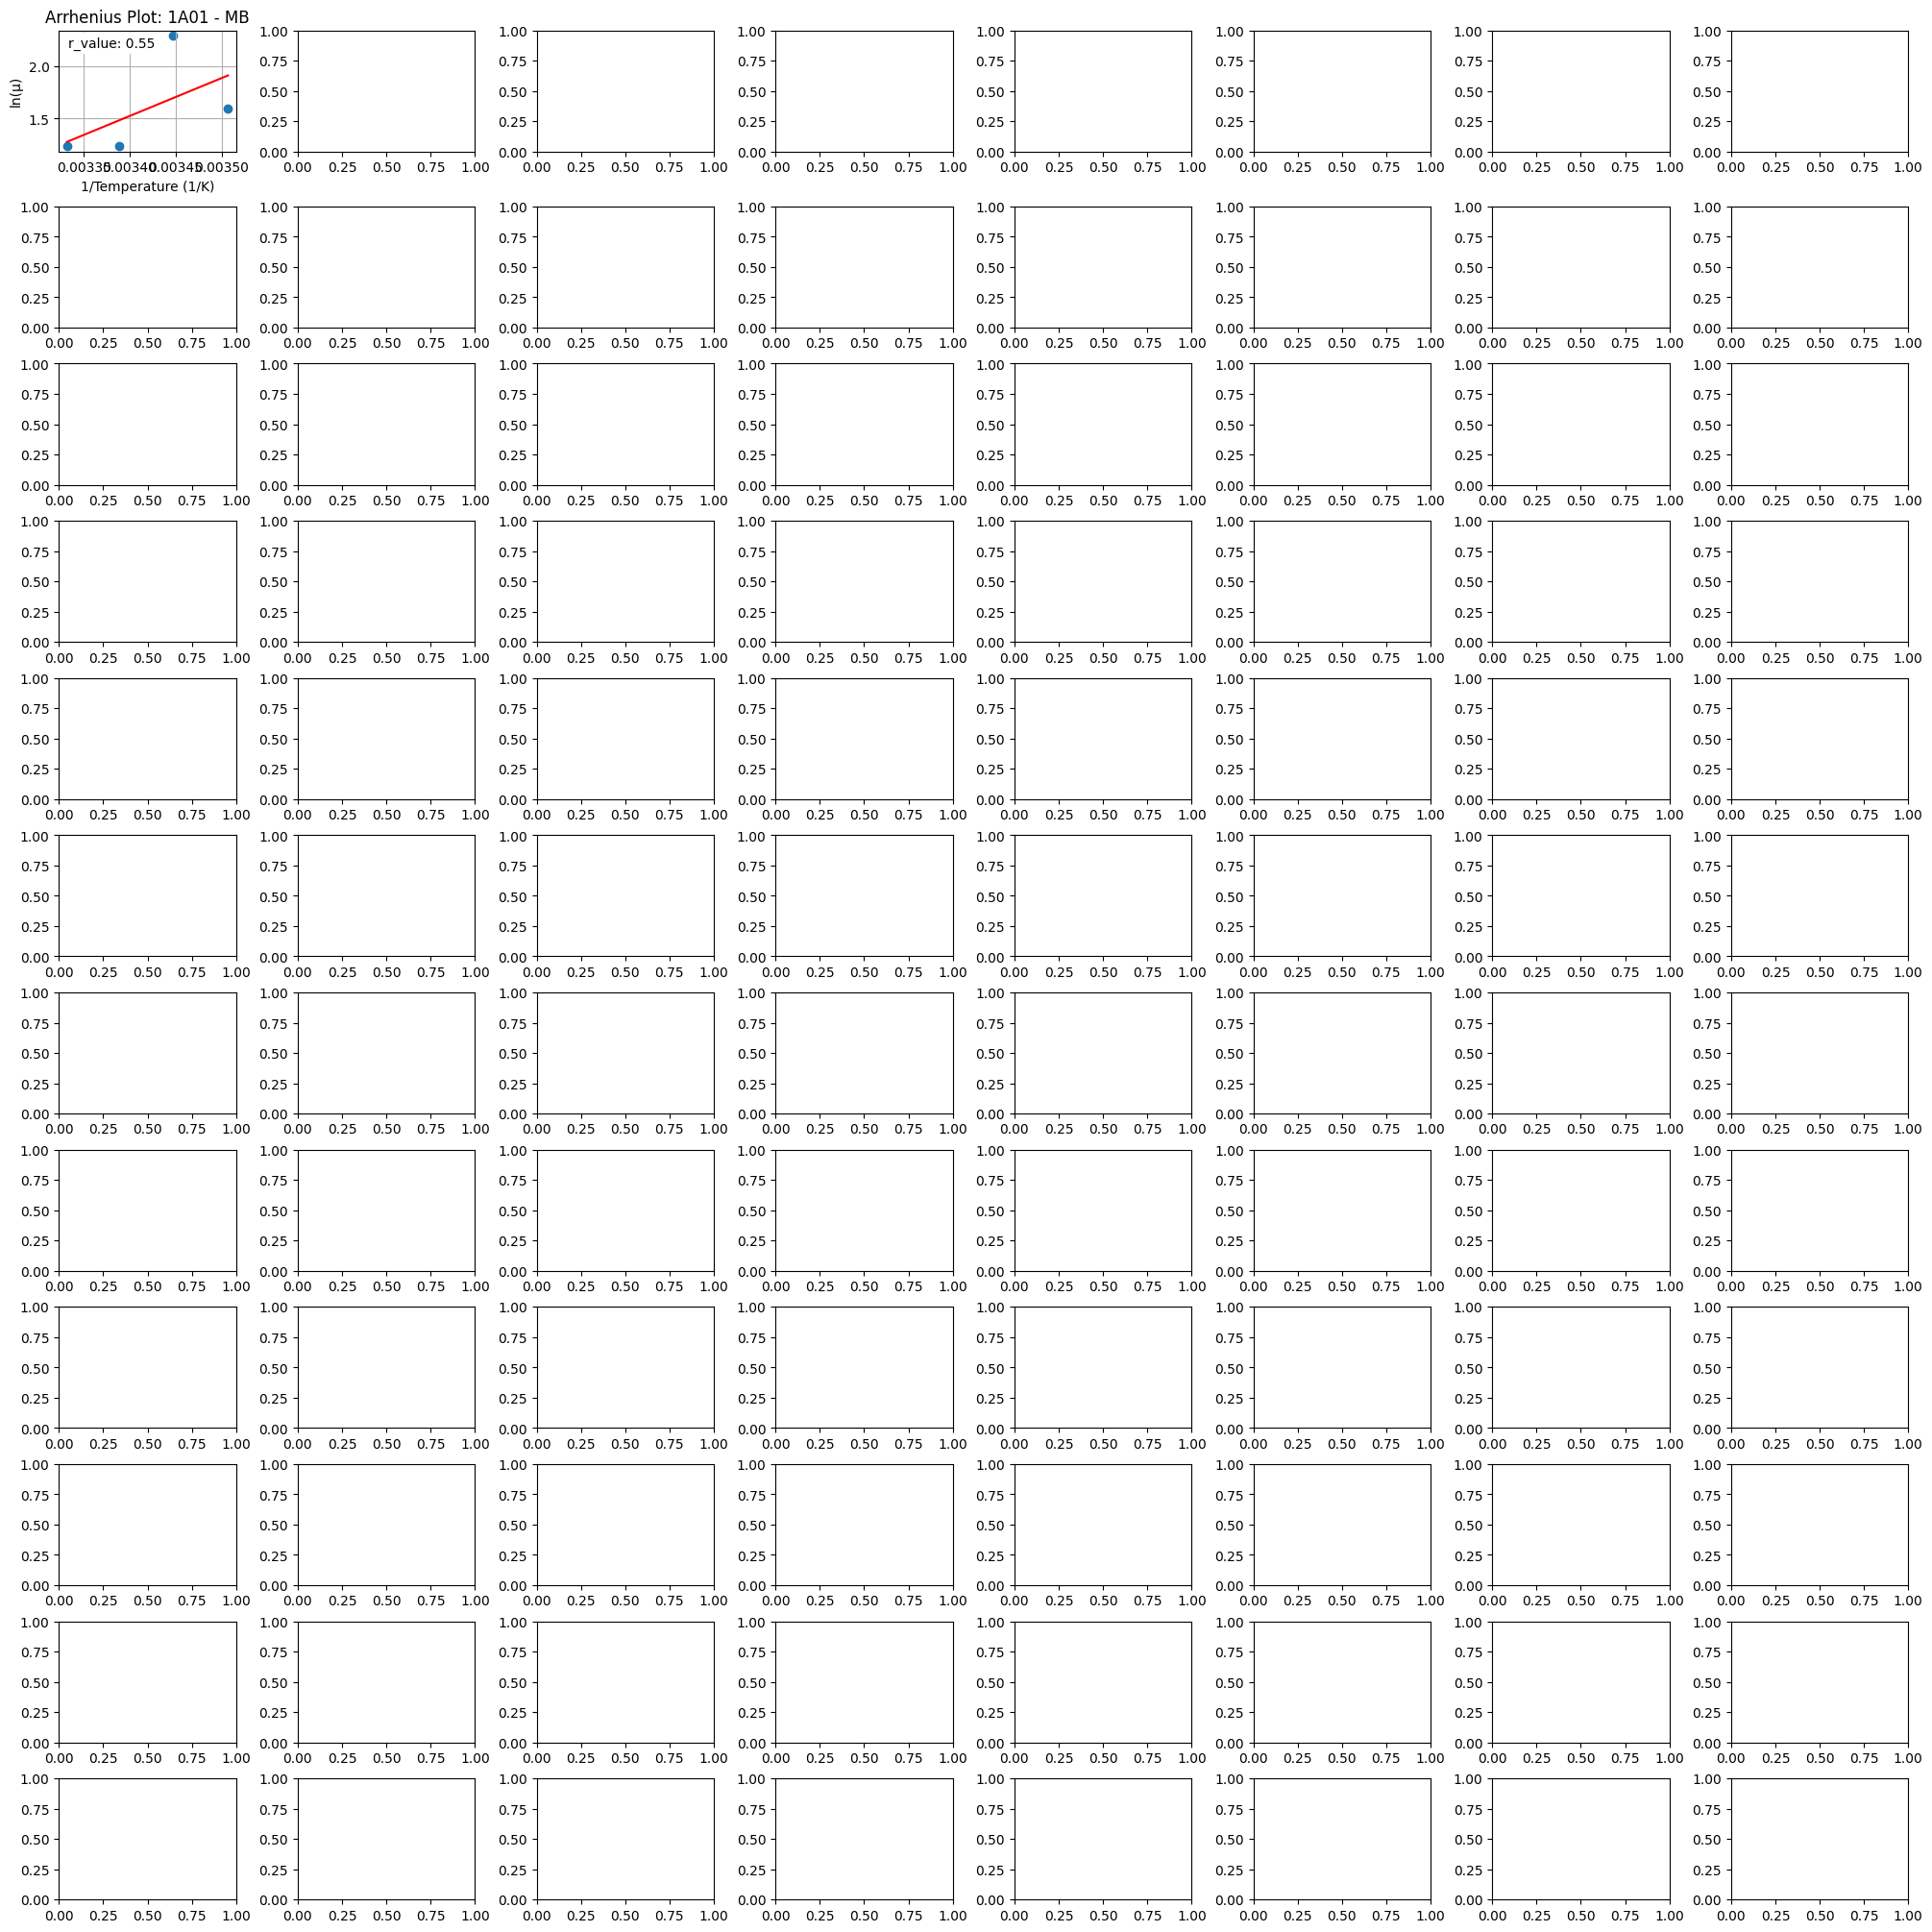

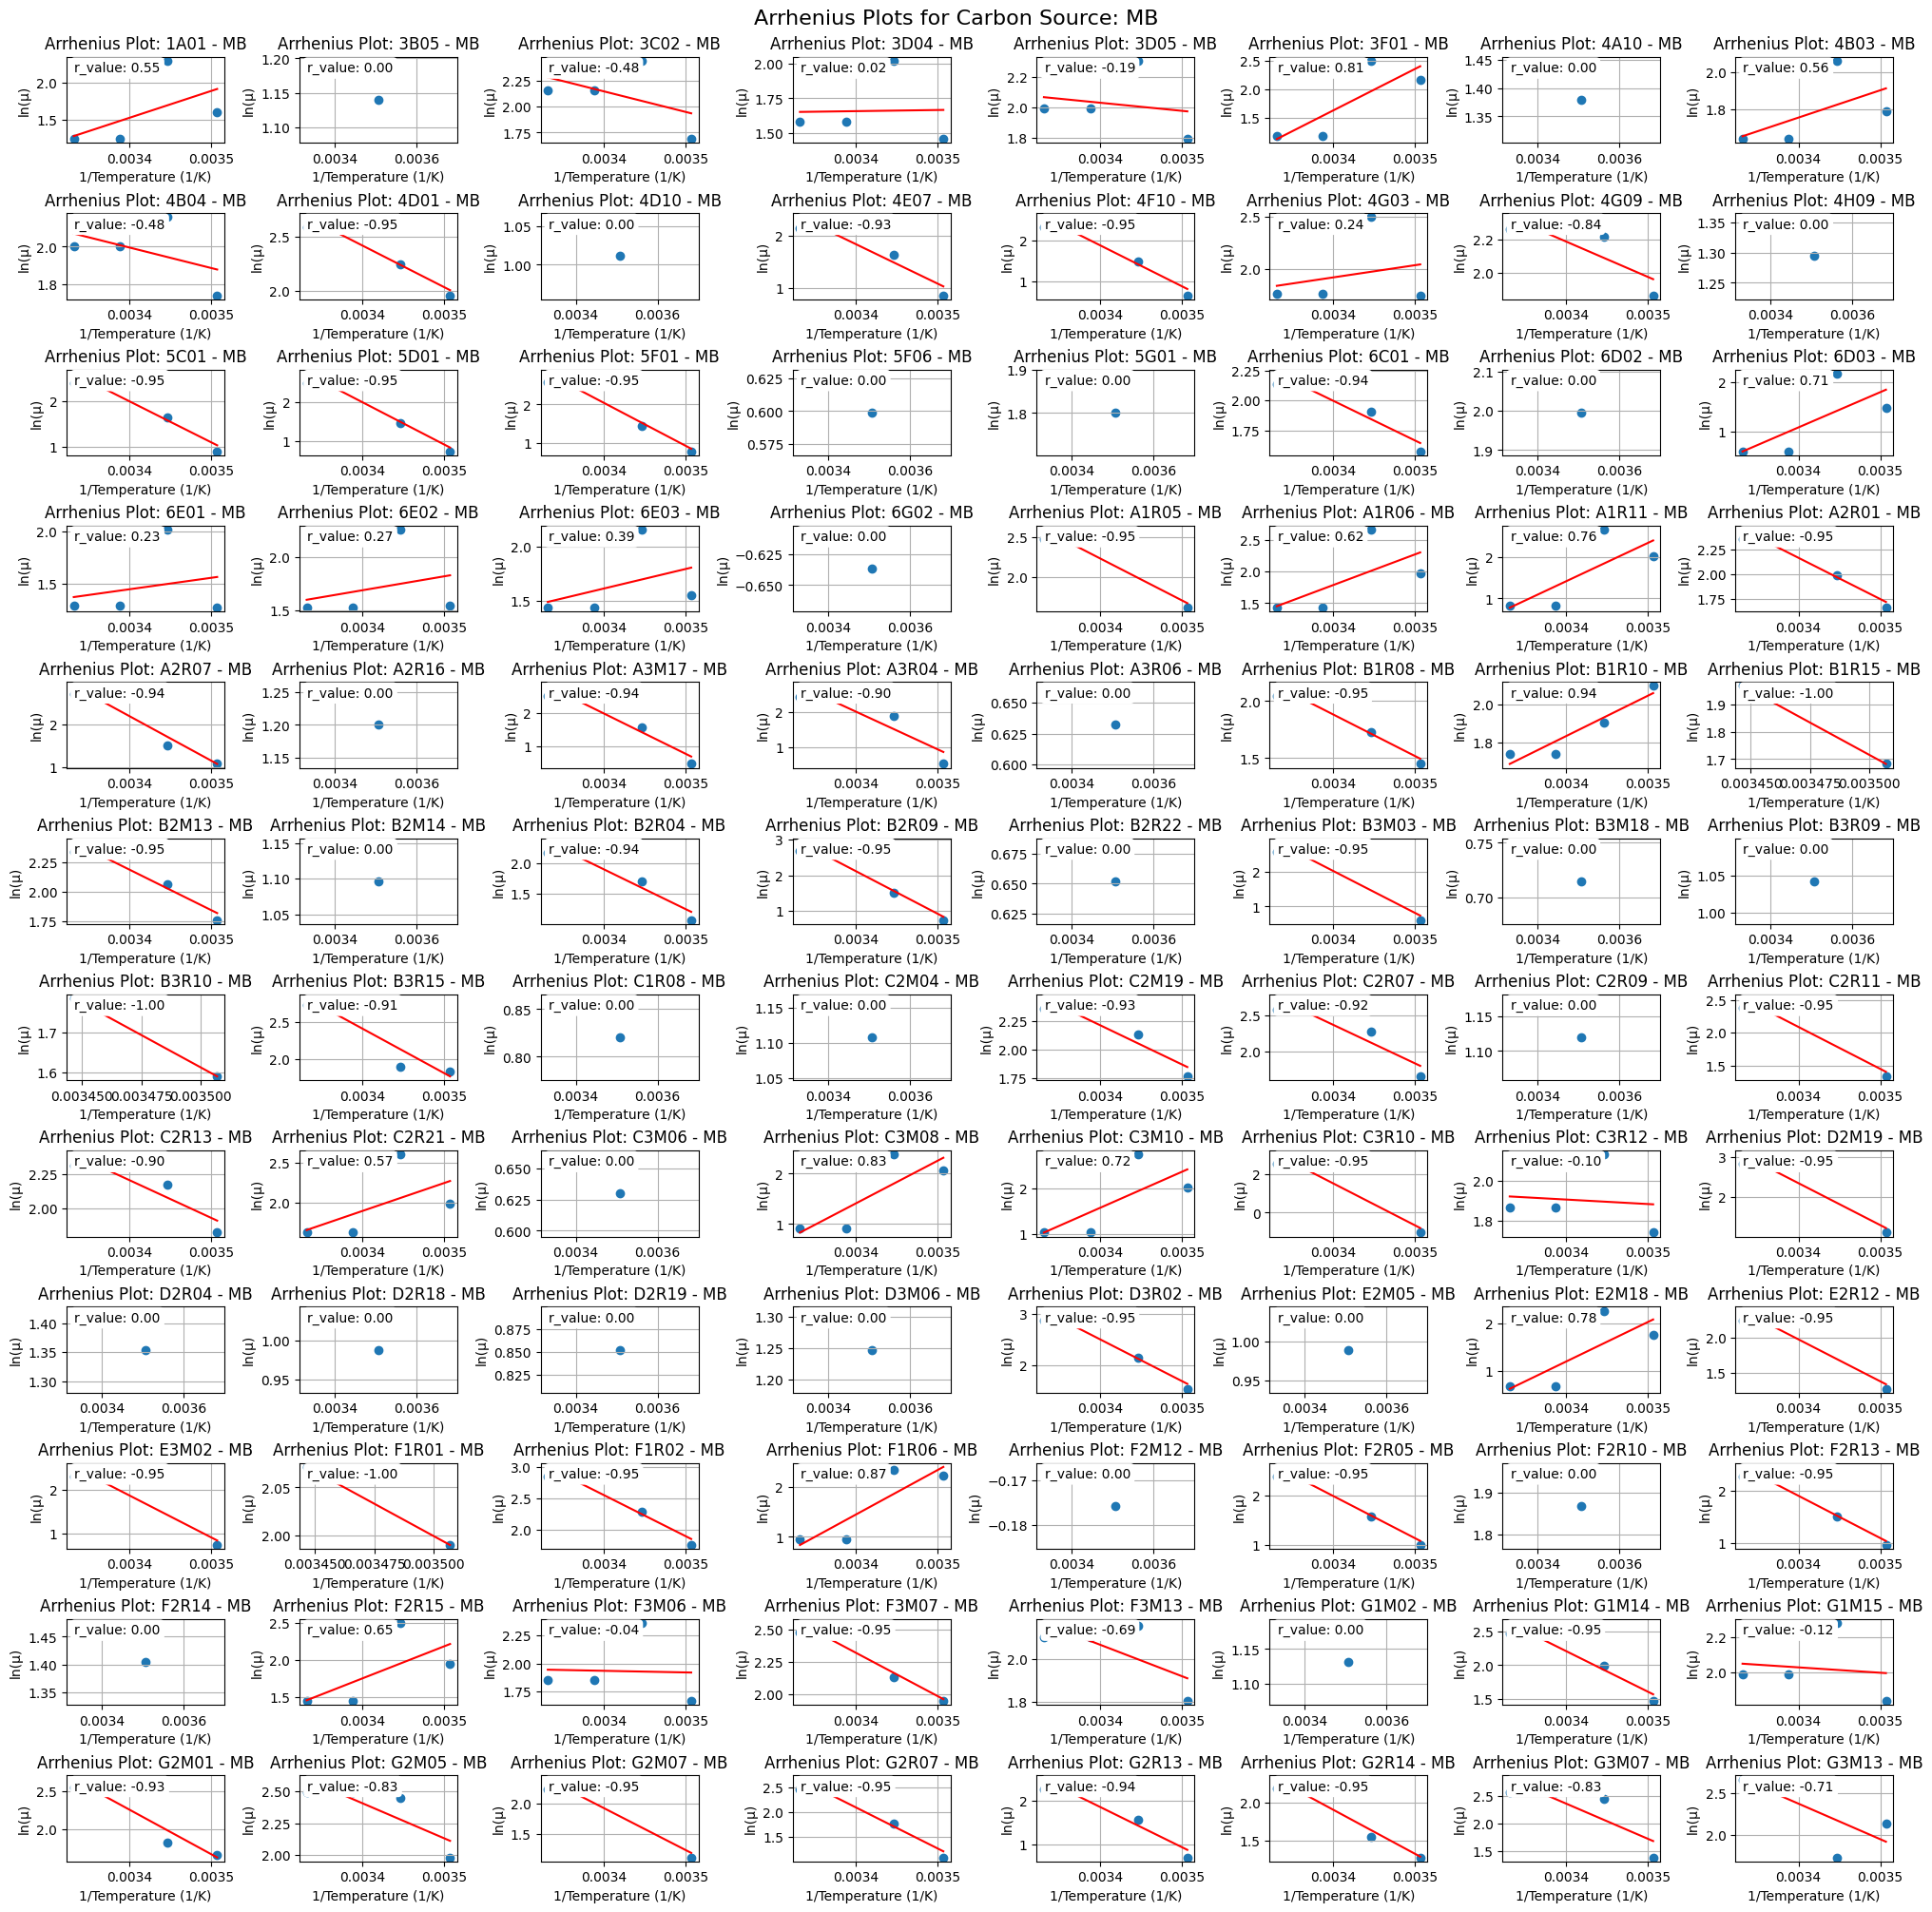

In [18]:
# Example usage
file_paths =['/Users/liucheng/Desktop/Internship/Old_data Matti/raw data modified /combined12_without_modeling.csv','/Users/liucheng/Desktop/Internship/Old_data Matti/raw data modified /combined17_without_modeling.csv','/Users/liucheng/Desktop/Internship/Old_data Matti/raw data modified /combined22_without_modeling.csv','/Users/liucheng/Desktop/Internship/Old_data Matti/raw data modified /combined27_without_modeling.csv']
temperatures = [12,17,22,27]   
activation_energy = ActivationEnergy(file_paths, temperatures)
Eadf=activation_energy.calculate_activation_energy()
activation_energy.plot_for_carbon_source('MB')